# 4.9 Task Part 2

This script contains the following points:
1. Creating histogram
2. Creating bar chart
3. Creating 2 line charts
4. Creating scatterplot
5. Export visualizations

### Task #1 - Import data, libraries, and dataframe from 4.9 Task 1

## Import data and libraries

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import dataframe

In [7]:
path = r'C:\Users\Barb\07-2024 Instacart Basket Analysis'

In [8]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'orders_products_all.pkl'))

## Check output

In [10]:
orders_products_all.shape

(30328763, 33)

In [11]:
orders_products_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marriage_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,buy_frequency,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average Orders,8,New customer,8.205882,Low spender,19.823529,Regular customer,both


In [12]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30328763 entries, 0 to 30328762
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependents    int64   
 8   marriage_status         object  
 9   income                  int64   
 10  order_id                object  
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  hour_time_of_order      int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  product_name            object  
 19  aisle_id                int64   
 20  department_id           int64   
 21  prices

## Creating Histogram

### Task #3 - Create a histogram of the 'hour_time_of_order' column

<Axes: ylabel='Frequency'>

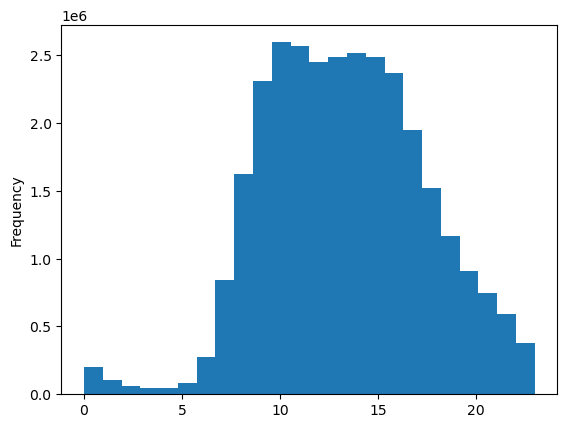

In [15]:
orders_products_all['hour_time_of_order'].plot.hist(bins = 24)

#### #3 Answer: The busiest hours of the day are between 10 am - 4 pm

#### Save histogram to Jupyter's memory

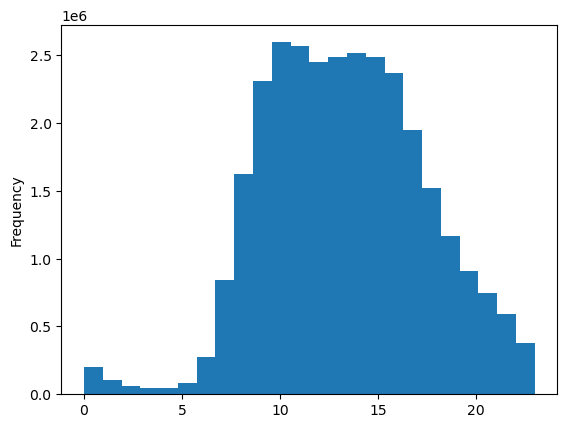

In [18]:
hist = orders_products_all['hour_time_of_order'].plot.hist(bins = 24)

## Creating Bar Chart

### Task #4. Create a bar chart from the 'loyalty_flag' column

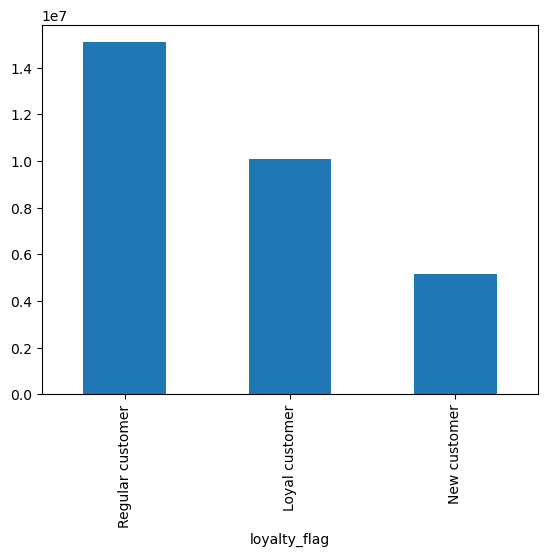

In [21]:
bar = orders_products_all['loyalty_flag'].value_counts().plot.bar()

## Creating Line Charts

### Task #5. Check if there is a difference in expenditure (the 'prices' column) depending on the hour of the day.

In [24]:
np.random.seed(4)    #set the seed

In [25]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

In [26]:
dev = np.random.rand(len (orders_products_all)) <= 0.7

#### Store 70% of the sample in the dataframe big

In [28]:
big = orders_products_all[dev]

#### Store 30% of the sample in the dataframe small

In [30]:
small = orders_products_all[~dev]

In [31]:
#Check that big + small = total rows of df customers_ords_prods_merge

In [32]:
len(orders_products_all)

30328763

In [33]:
len(big) + len(small)

30328763

#### Create a new df, df_2, that contains only the 'prices' and 'hour_time_of_order' columns from your small subset

In [35]:
df_2 = small[['hour_time_of_order','prices']]

#### Create line graph of 'hour_time_of_order' vs 'prices'

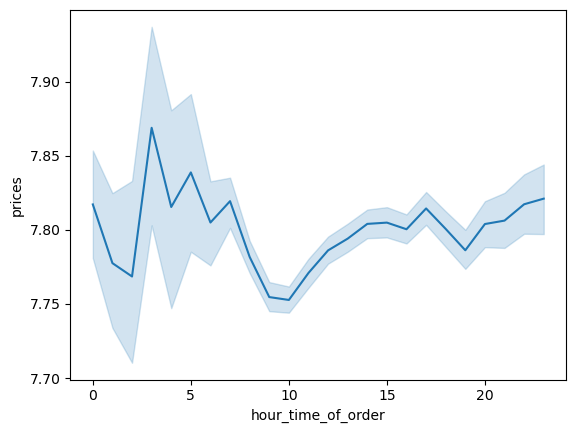

In [37]:
line_hourorder_prices = sns.lineplot(data = df_2, x = 'hour_time_of_order', y = 'prices')

#### #5 Answer - The most expensive items tend to be ordered in the early morning hours (2am - 7am)

### Task #6. Determine if there is a connection between age and number of dependents by creating a line chart

In [40]:
# Create a new df, df_3, that contains only the 'age' and 'number_of_dependents' columns from your small subset

In [41]:
df_3 = small[['age','number_of_dependents']]

#### Create line graph of 'age' vs 'number of dependents'

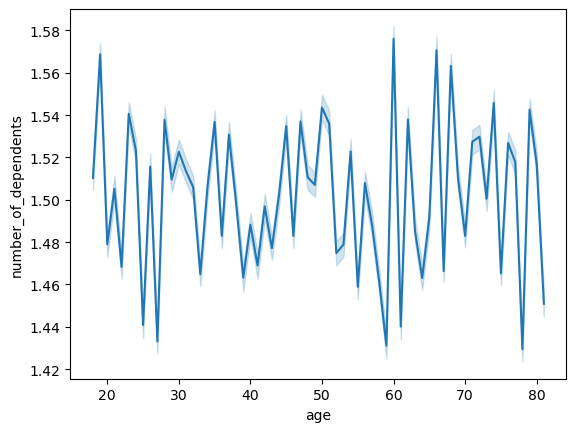

In [43]:
line_age_dependents = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependents')

#### #6 Answer - There's no connection between age and number of dependents.

## Creating Scatterplot

### Task #7. Determine if there is a connection between age and spending power (income) by creating a scatterplot

In [47]:
# Create scatterplot that contains only the 'age' and 'income' columns from your df

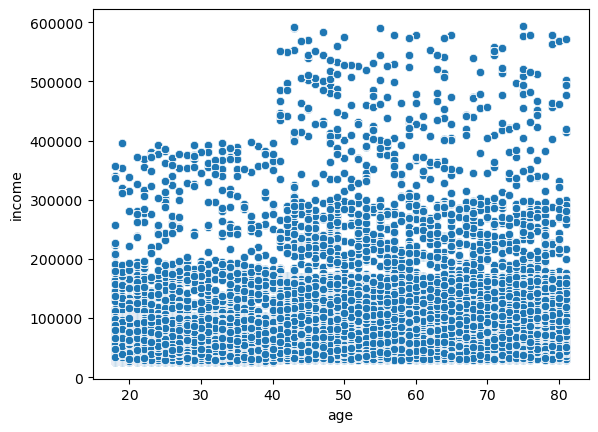

In [48]:
scatter = sns.scatterplot(x = 'age', y = 'income',data = orders_products_all)

#### #7 Answer: Before 40 years of age, all customers make < 400,000. 
#### After 40 years of age, there are a significant number of customers with an income from 400,000 to 600,000

## Export Visualizations

### Task #8. Export your visualizations as ".png" files in your relevant project folder.

In [52]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_time_of_order.png'))

In [53]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [54]:
line_hourorder_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_order_price.png'))

In [55]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

In [56]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))